## Description:

 Hypothesis testing of microbial community composition and relation to enzyme activity


# Init

In [2]:

%load_ext rpy2.ipython

In [3]:
%%R

library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)
library(vegan)
library(DESeq2)



/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from

# Setting files

# Setting variables

In [4]:
%%R
workDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/'
#using physeq file with sparsity of greater than 3 in 3 samples
physeqFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r'

# Loading/editting OTU table

In [6]:
%%R 
setwd(workDir)
physeq.Full = readRDS(physeqFile)
physeq.Full.m = physeq.Full %>% sample_data
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


## Calculate pairwise weighted Unifrac distances between samples

In [7]:
%%R
registerDoParallel(cores=28)
full.wunif.dist = phyloseq::distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

# NMDS of w-unif

Run 0 stress 0.1405103 
Run 1 stress 0.1580921 
Run 2 stress 0.1957017 
Run 3 stress 0.1581813 
Run 4 stress 0.1650433 
Run 5 stress 0.1599751 
Run 6 stress 0.1741184 
Run 7 stress 0.1428806 
Run 8 stress 0.1529565 
Run 9 stress 0.1544595 
Run 10 stress 0.1429704 
Run 11 stress 0.1429601 
Run 12 stress 0.1586468 
Run 13 stress 0.1454434 
Run 14 stress 0.1615504 
Run 15 stress 0.1482952 
Run 16 stress 0.1458797 
Run 17 stress 0.162921 
Run 18 stress 0.1820772 
Run 19 stress 0.1939331 
Run 20 stress 0.175484 


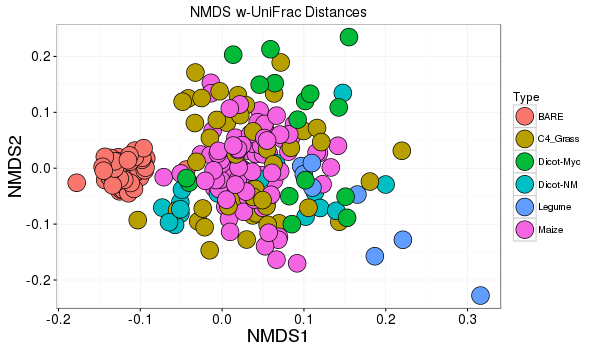

In [8]:
%%R -w 600 -h 350

nmds = ordinate(physeq.Full, 
                method = "NMDS", 
                distance = full.wunif.dist)

p = plot_ordination(physeq.Full, nmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Type), pch = 21, size = 8) +
        theme_bw() +
        theme(axis.text = element_text(size = 14), 
              axis.title = element_text(size = 18)) +
        labs(title = "NMDS w-UniFrac Distances", size = 20)
        #scale_size(range=c(2,8))

##need arrange into a presentation quality graphic and save

grid.arrange(p1, ncol=1)
#ggsave(filename = "NMDS_full_wunif.pdf", plot = p1)

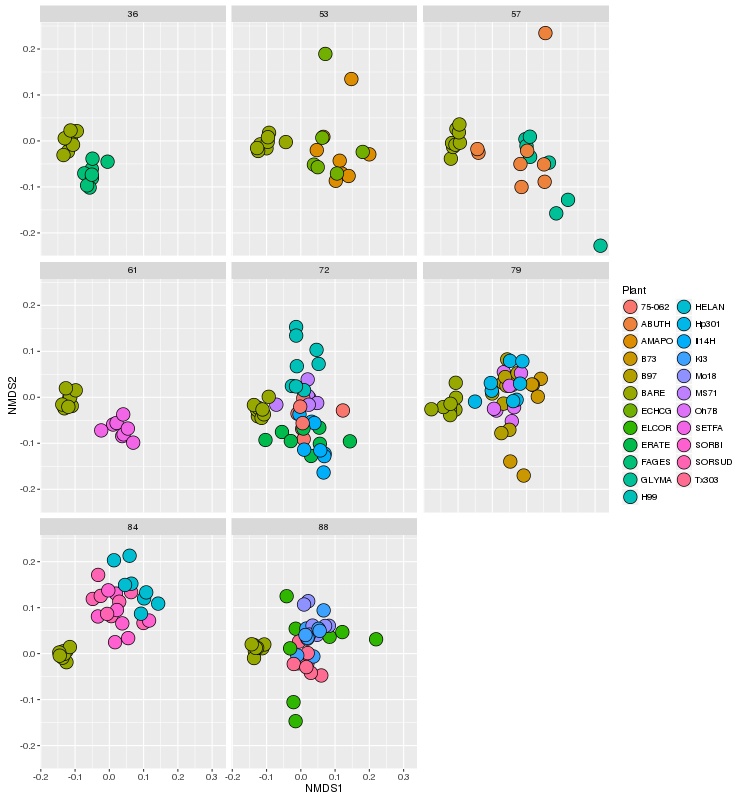

In [9]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) +
        facet_wrap(~ DAP) +
        scale_size(range=c(2,8))

p1

## Subset just plants to evaluate variation without bare soil

In [11]:
%%R

physeq.plant = subset_samples(physeq.Full, Plant != "BARE")
physeq.plant

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [12]:
%%R
#create maize/non-maize variable
sample_data(physeq.plant)$Maize = ifelse(sample_data(physeq.plant)$Type == "Maize", "Maize", 
                                         "Annuals")
sample_data(physeq.plant)$Maize = factor(sample_data(physeq.plant)$Maize)

In [13]:
%%R
registerDoParallel(cores=28)
plant.wunif.dist = phyloseq::distance(physeq.plant, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

# NMDS of plant only w-UNIF

Run 0 stress 0.1704945 
Run 1 stress 0.1903814 
Run 2 stress 0.1890118 
Run 3 stress 0.1829121 
Run 4 stress 0.1836476 
Run 5 stress 0.1803039 
Run 6 stress 0.1887361 
Run 7 stress 0.2033775 
Run 8 stress 0.2028446 
Run 9 stress 0.1818353 
Run 10 stress 0.2040171 
Run 11 stress 0.192161 
Run 12 stress 0.1916547 
Run 13 stress 0.41599 
Run 14 stress 0.1868128 
Run 15 stress 0.1825808 
Run 16 stress 0.1901092 
Run 17 stress 0.1850533 
Run 18 stress 0.1900693 
Run 19 stress 0.1990987 
Run 20 stress 0.2053865 


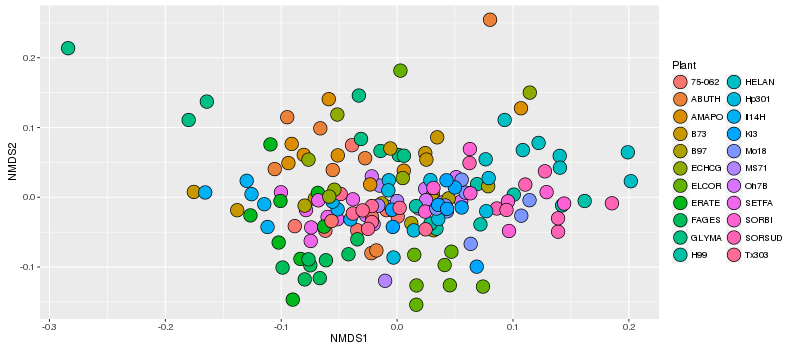

In [21]:
%%R -w 800 -h 350


plantnmds = ordinate(physeq.plant, 
                method = "NMDS", 
               distance = plant.wunif.dist)

p = plot_ordination(physeq.plant, plantnmds, justDF = TRUE)
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) +
        scale_size(range=c(2,8))
p1

In [19]:
%%R
#keepvariables = sample_data(physeq.plant)[,c(34:37,43)]
plantsd = data.frame(sample_data(physeq.plant))
sd = data.frame(sample_data(physeq.Full))

## Now overlay enzyme data

In [20]:
%%R
#keepvariables = sample_data(physeq.plant)[,c(34:37,43)]

plantenz = plantsd[,c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")] #select enzyme activity data

fullenz = sd[,c("BX_activity_g", "CB_activity_g", "LAP_activity_g", "NAG_activity_g")] #select enzyme activity data


***VECTORS

                  NMDS1    NMDS2     r2 Pr(>r)  
BX_activity_g  -0.23748  0.97139 0.0016  0.862  
CB_activity_g  -0.29373  0.95589 0.0376  0.039 *
LAP_activity_g  0.87994 -0.47508 0.0084  0.491  
NAG_activity_g  0.09680  0.99530 0.0093  0.450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999


                      NMDS1      NMDS2 var
BX_activity_g  -0.009571105  0.0391504  BX
CB_activity_g  -0.056922949  0.1852479  CB
LAP_activity_g  0.080433057 -0.0434254 LAP
NAG_activity_g  0.009342169  0.0960525 NAG


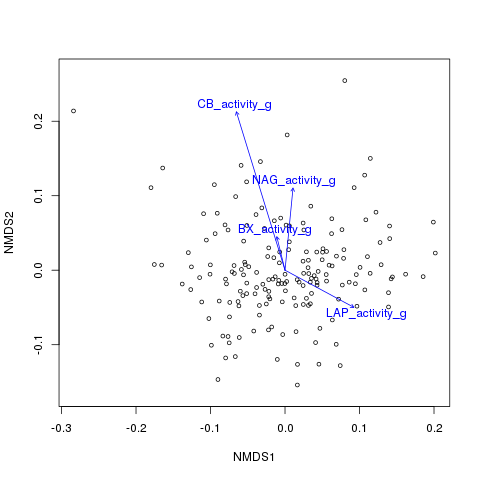

In [25]:
%%R
ord.fit = envfit(plantnmds ~ BX_activity_g + CB_activity_g + LAP_activity_g + NAG_activity_g, plantsd)
sol = plantnmds
NMDS = data.frame(MDS1 = sol$points[,1], MDS2 = sol$points[,2])
#plot(nmds)
#plot(ord.fit)
ord.fit %>% print
enz_scores = data.frame(scores(ord.fit, "vectors")) 
enz_scores$var = c("BX", "CB", "LAP", "NAG")
enz_scores %>% print
plot(plantnmds)
plot(ord.fit)

In [ ]:
%%R
hist(sample_data(physeq.plant)$CB_rel)


In [ ]:
%%R -w 650 -h 450


# generating plot with enzyme activity of LAP as coloring 
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        #geom_point(aes(color=LAP_dif), size = 7, pch=21)+
        geom_point(size = 5, pch = 21, aes(fill = CB_rel)) +
        scale_fill_gradient2(name = "CB Activity", limits=c(10,40), low = "blue", high = "red", midpoint = 22) + 
    #geom_segment(data=enz_scores,aes(x=0,xend=NMDS1,y=0,yend=NMDS2),
     # arrow = arrow(length = unit(0.5, "cm")),colour="grey",inherit_aes=FALSE)+
        #geom_text(data=enz_scores,aes(x=NMDS1,y=NMDS2,label=var),size=5) +
        facet_wrap(~Maize) +
        theme_bw() +
        theme(axis.text = element_text(size = 14), 
              axis.title = element_text(size = 18),
             strip.text = element_text(size=25)) +
        theme(legend.title = element_text(colour = 'black', angle = 0, size = 18, 
                                          hjust = 3, vjust = 7, face = 'bold')) +
        theme(legend.text = element_text(size = 8)) +
        #theme(legend.key.size = unit(1, "cm"))+
        labs(title = "nMDS w-UniFrac Distances", size = 20)

p1
#ggsave(filename = "facet_NMDS_w-enz.pdf", plot = p1)

# Beta-diversity hypothesis testing on plant subset 
*Note that maize/non-maize variable should be tested too, for consistency

In [ ]:
%%R
colnames(df)

In [ ]:
%%R
df = as(sample_data(physeq.plant), "data.frame")
d = plant.wunif.dist
plantadonis = adonis(d ~ tN_p + DAP + Plant + Treatment + Rep, df)
plantadonis

In [ ]:
%%R
#Compare bray to w-unifrac
df = as(sample_data(physeq.plant), "data.frame")
d = plant.bray.dist
plantadonis = adonis(d ~ DAP + Plant + Treatment, df)
plantadonis

*Note: what OTUs are influenced by fertilization treatment?

In [ ]:
%%R
plant_group = get_variable(physeq.plant, "Plant")
d = plant.wunif.dist
ano1 = anosim(d, plant_group)
summary(ano1)

### Beta-diversity hypothesis tests on just maize

## Now on just non-maize Need to fix

In [ ]:
%%R
sample_data(physeq.plant)$Maize

In [ ]:
%%R
plant.nm = subset_samples(physeq.plant, Maize == "Annuals")
plant.m = subset_samples(physeq.plant, Maize == "Maize")
plant.nm
plant.m

In [ ]:
%%R
registerDoParallel(cores=28)

maize.wunif.dist = phyloseq::distance(plant.m, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

nm.wunif.dist = phyloseq::distance(plant.nm, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

# Test correlation between enzyme activity and microbial community composition

In [ ]:
%%R
colnames(Sd)

In [ ]:
%%R
#Test on soil activity/rhizosphere effect
Sd = sample_data(physeq.thresh)
enz.d = dist(Sd[,32:35], method = "euclidian")
hist(enz.d)
M1 = mantel(full.wunif.dist, enz.d, method="pearson", permutations=999)
M1
#Model is not significant within just plants or within entire dataset

In [ ]:
%%R
#Test on "difference" rhizosphere effect
Sd = sample_data(physeq.plant)
enz.d = dist(Sd[,36:39], method = "euclidean")
hist(enz.d)
M1 = mantel(plant.wunif.dist, enz.d, method="pearson", permutations=999)
M1
#Model is not significant based on difference calculation

In [ ]:
%%R
#Test on relative rhizosphere effect
Sd = sample_data(physeq.plant)
enz.d = dist(Sd[,40:43], method = "euclidian")
print(hist(enz.d))
M1 = mantel(plant.wunif.dist, enz.d, method="pearson", permutations=999)
print(M1)



In [ ]:
%%R
#Test if rel effect is different when comparing among maize or non-maize
Sd = sample_data(plant.m)
enz.d = dist(Sd[,40:43], method = "euclidian")
print(hist(enz.d))
M1 = mantel(maize.wunif.dist, enz.d, method="pearson", permutations=999)
print(M1)

Sd = sample_data(plant.nm)
enz.d = dist(Sd[,40:43], method = "euclidian")
print(hist(enz.d))
M1 = mantel(nm.wunif.dist, enz.d, method="pearson", permutations=999)
print(M1)

In [ ]:
%%R
 p1 = protest(plant.wunif.dist, enz.d, scores = "sites", permutations = 999)
plot(p1)